In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


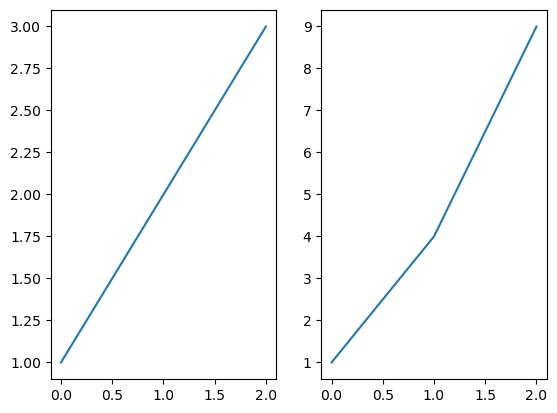

In [11]:
fig = plt.figure(2)

x = [0, 1, 2]

data = [1, 2, 3]
data2 = [1, 4, 9]

ax1 = fig.add_subplot(121)  
ax2 = fig.add_subplot(122)  

ax1.plot(x, data)

ax2.plot(x, data2)

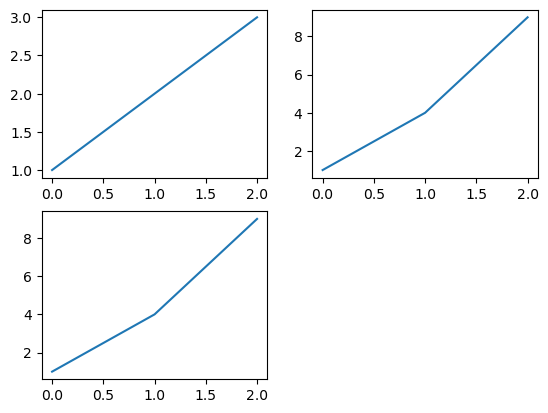

In [13]:
fig = plt.figure(3)

x = [0, 1, 2]

data = [1, 2, 3]
data2 = [1, 4, 9]

ax1 = fig.add_subplot(221)  
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

ax1.plot(x, data)
ax2.plot(x, data2)
ax3.plot(x, data2)

In [14]:
housing_raw = pd.read_csv("D:/STUDIES/Data Visualization/Data/housing_data.csv", 
                          parse_dates=['period_begin', 'period_end'], 
                          dtype={'total_homes_sold':'Int32', 'region_name': 'category'})

In [19]:
ca_housing = (housing_raw.loc[housing_raw['region_name'].str.contains("CA")]\
                .assign(region_name = housing_raw['region_name'].str[0:-11]).set_index("period_begin").sort_index())

ca_housing_pivot = ca_housing.pivot_table(index="period_begin", columns="region_name", 
                                          values="median_active_list_price").assign(CA_average = lambda x : x.mean(axis=1))

ca_housing_markets = ca_housing_pivot.loc[:,["San Francisco", "Los Angeles", "San Diego", "Tulare"]]

ca_housing_markets.head()

region_name,San Francisco,Los Angeles,San Diego,Tulare
period_begin,,,,
2017-01-02,1229018.7,611561.0,618570.8,225395.8
2017-01-09,1233393.7,614061.0,621737.5,227729.1
2017-01-16,1239977.0,617311.0,625820.8,229060.4
2017-01-23,1247977.0,620644.3,629491.6,229806.2
2017-01-30,1253310.4,624541.6,632824.0,230139.5


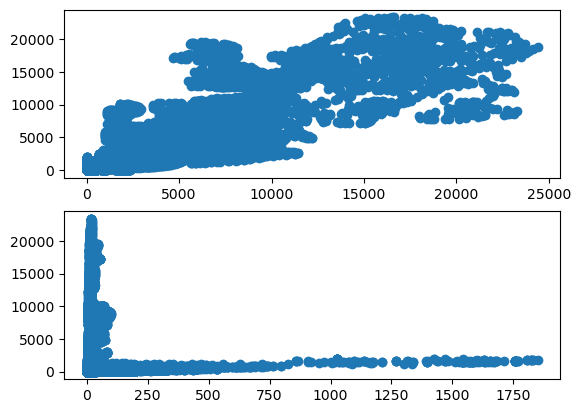

In [23]:
fig, ax = plt.subplots(2,1)

ax[0].scatter(
    housing_raw.loc[:,"total_homes_sold"], housing_raw.loc[:, "inventory"]
)

ax[1].scatter(
    housing_raw.loc[:,"months_of_supply"], housing_raw.loc[:, "inventory"]
)

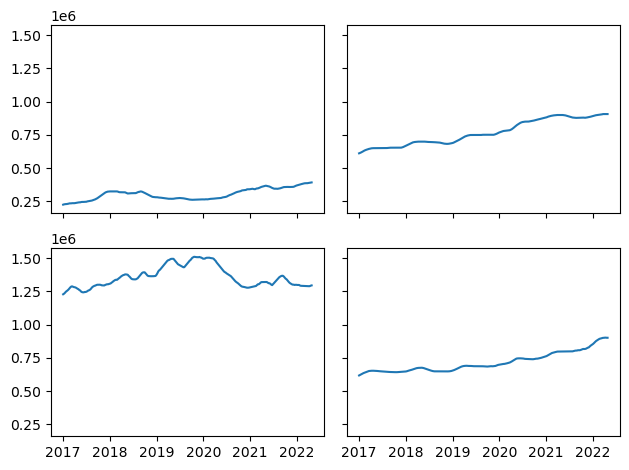

In [27]:
fig, ax = plt.subplots(2,2, sharex="all", sharey="all")

ax[0][0].plot(
    ca_housing_markets.index, ca_housing_markets["Tulare"]
)

ax[0][1].plot(
    ca_housing_markets.index, ca_housing_markets["Los Angeles"]
)
ax[1][0].plot(
    ca_housing_markets.index, ca_housing_markets["San Francisco"]
)
ax[1][1].plot(
    ca_housing_markets.index, ca_housing_markets["San Diego"]
)

plt.tight_layout()